In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import plotly.express as px
from matplotlib import colors
from os import listdir
from os.path import isfile, join
import numpy as np, colorsys
import streamlit as st
import math

In [2]:
soy_data = pd.read_csv('https://raw.githubusercontent.com/friedrich-henrique/datasets_soybeans_research/main/soytrade_dataset.csv')
flour_data = pd.read_csv('https://raw.githubusercontent.com/friedrich-henrique/datasets_soybeans_research/main/flour_dataset.csv')

In [130]:
G_weighted = nx.DiGraph()
for row in range(len(soy_data)):
    G_weighted.add_edge(soy_data["Source"][row], soy_data["Target"][row], weight=soy_data["trade_value"][row])

In [84]:
def choose_colors(node_list):

    num_colors = len(node_list)
    
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (30 + np.random.rand() * 70)/100.0
        saturation = (30 + np.random.rand() * 70)/100.0
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [86]:
colors = choose_colors(G_weighted.nodes()) 

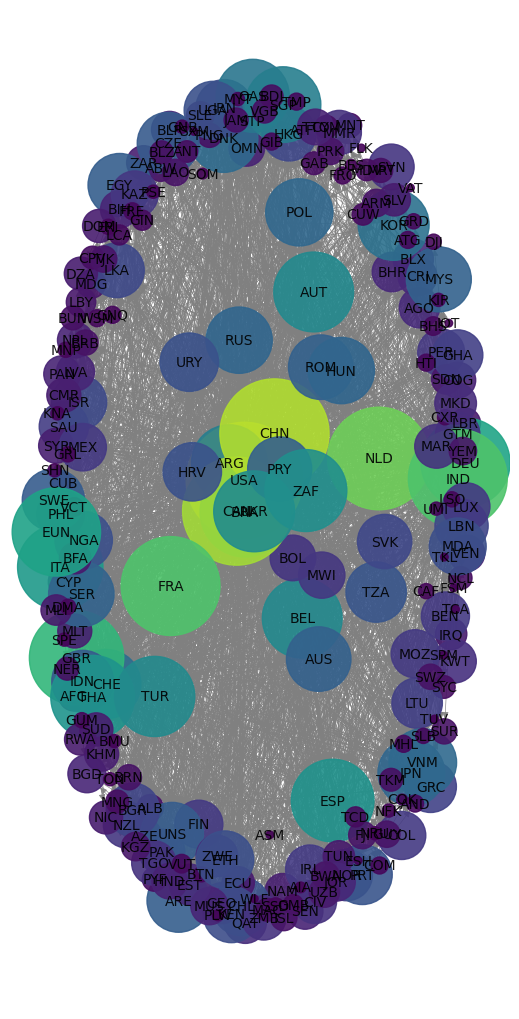

In [143]:
fig = plt.figure(figsize=(10,10))
n_size = [G_weighted.degree(node) * 30 for node in G_weighted]
pos = nx.spring_layout(G_weighted, scale=3, k=20)
nx.draw(G_weighted, node_size=n_size, with_labels=True, font_size=10, font_color='black', node_color=colors, pos=pos, edge_color='grey', width=0.5, alpha=0.9)

plt.show()


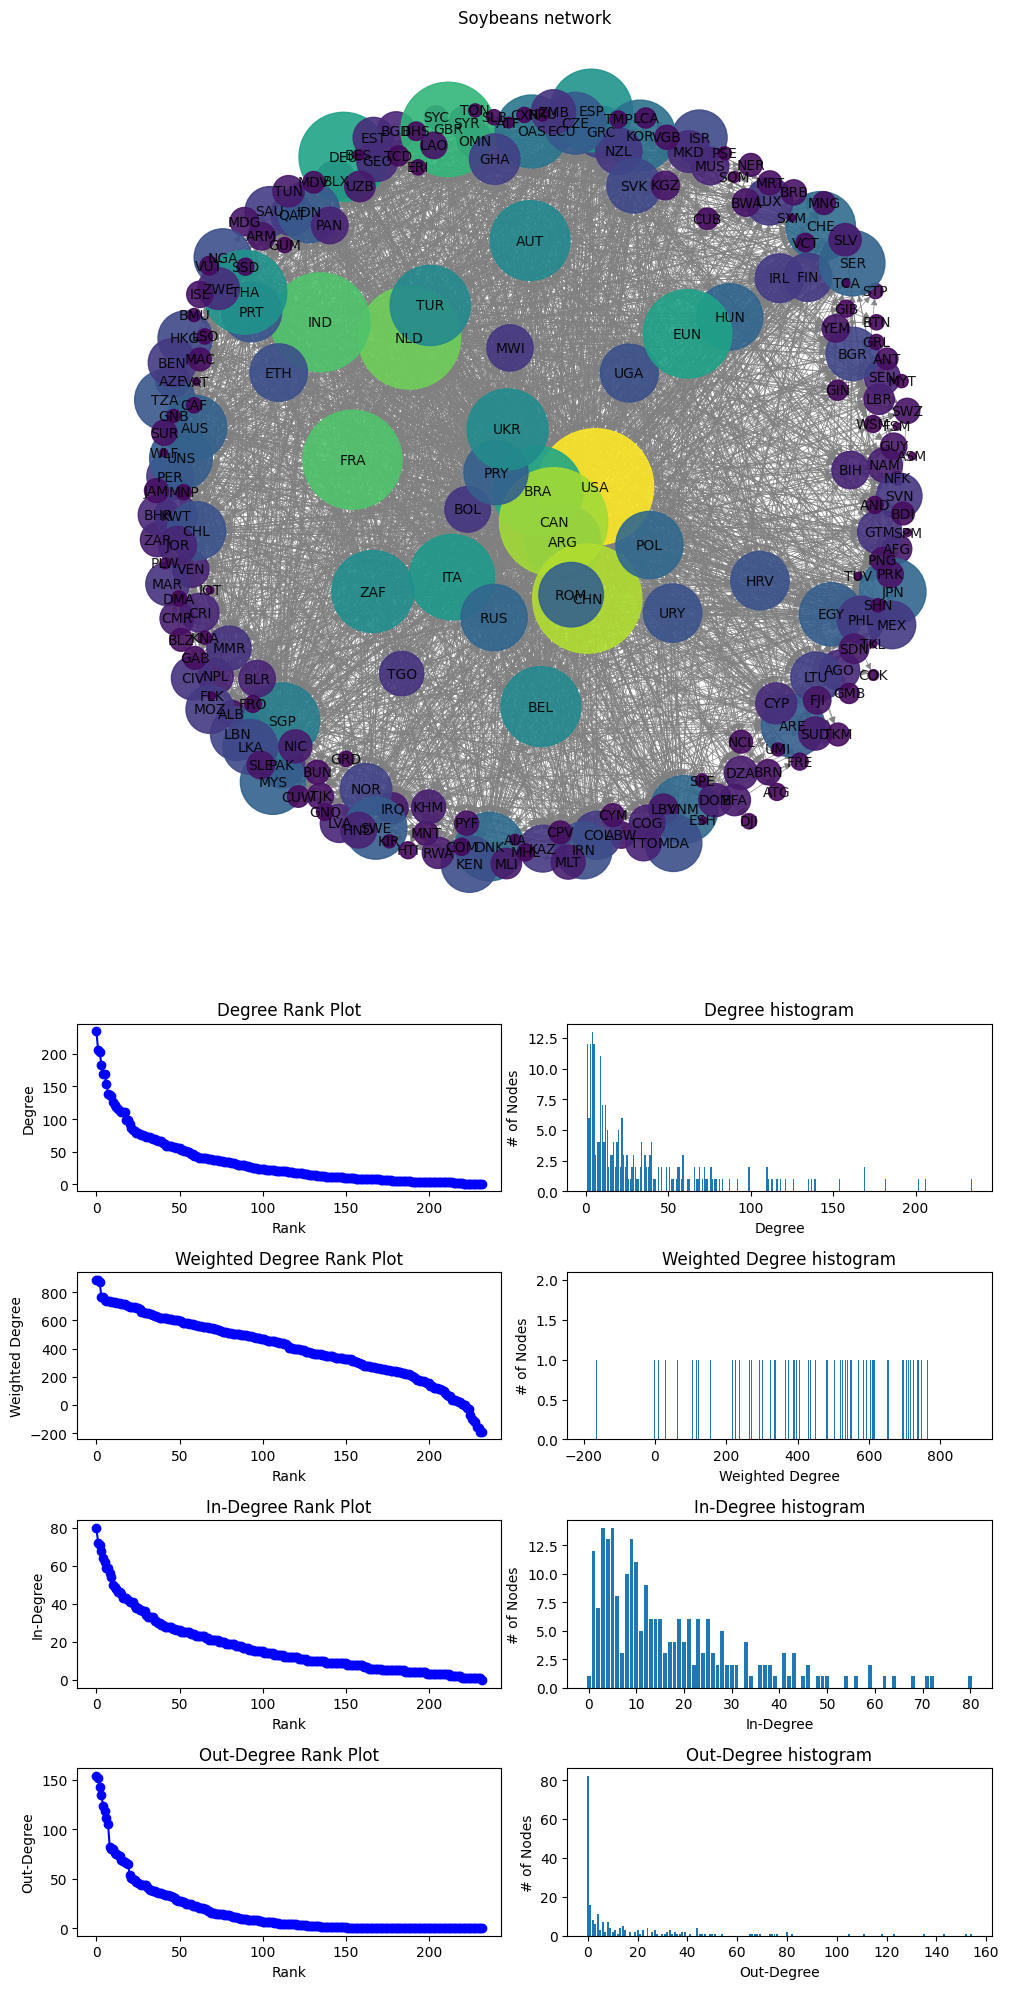

In [144]:
degree_sequence = sorted((d for n, d in G_weighted.degree()), reverse=True)
dmax = max(degree_sequence)

in_degree_sequence = sorted((d for n, d in G_weighted.in_degree()), reverse=True)
idmax = max(in_degree_sequence)

out_degree_sequence = sorted((d for n, d in G_weighted.out_degree()), reverse=True)
odmax = max(out_degree_sequence)

weight_degree_sequence = sorted((d for n, d in G_weighted.degree(weight='weight')), reverse=True)
weight_degree_sequence = [math.log(x)*50 for x in weight_degree_sequence]
wdmax = max(weight_degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(10, 20))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(8, 4)

ax0 = fig.add_subplot(axgrid[0:4, :])
n_size = [G_weighted.degree(node) * 30 for node in G_weighted]
pos = nx.spring_layout(G_weighted, scale=3, k=20)
nx.draw(G_weighted, node_size=n_size, with_labels=True, font_size=10, font_color='black', node_color=colors, pos=pos, edge_color='grey', width=0.5, alpha=0.9)
ax0.set_title("Soybeans network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[4:5, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[4:5, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

ax3 = fig.add_subplot(axgrid[5:6, :2])
ax3.plot(weight_degree_sequence, "b-", marker="o")
ax3.set_title("Weighted Degree Rank Plot")
ax3.set_ylabel("Weighted Degree")
ax3.set_xlabel("Rank")

ax4 = fig.add_subplot(axgrid[5:6, 2:])
ax4.bar(*np.unique(weight_degree_sequence, return_counts=True))
ax4.set_title("Weighted Degree histogram")
ax4.set_xlabel("Weighted Degree")
ax4.set_ylabel("# of Nodes")

ax5 = fig.add_subplot(axgrid[6:7, :2])
ax5.plot(in_degree_sequence, "b-", marker="o")
ax5.set_title("In-Degree Rank Plot")
ax5.set_ylabel("In-Degree")
ax5.set_xlabel("Rank")

ax6 = fig.add_subplot(axgrid[6:7, 2:])
ax6.bar(*np.unique(in_degree_sequence, return_counts=True))
ax6.set_title("In-Degree histogram")
ax6.set_xlabel("In-Degree")
ax6.set_ylabel("# of Nodes")

ax7 = fig.add_subplot(axgrid[7:, :2])
ax7.plot(out_degree_sequence, "b-", marker="o")
ax7.set_title("Out-Degree Rank Plot")
ax7.set_ylabel("Out-Degree")
ax7.set_xlabel("Rank")

ax8 = fig.add_subplot(axgrid[7:, 2:])
ax8.bar(*np.unique(out_degree_sequence, return_counts=True))
ax8.set_title("Out-Degree histogram")
ax8.set_xlabel("Out-Degree")
ax8.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()